## The Data Overview :

This dataset contains anonymized information about customer subscriptions and their interaction with the service. The data includes various features such as subscription type, payment method, viewing preferences, customer support interactions, and other relevant attributes. It consists of three files such as "test.csv", "train.csv", "data_descriptions.csv".

The Data Description

CustomerID: Unique identifier for each customer

SubscriptionType: Type of subscription plan chosen by the customer (e.g., Basic, Premium, Deluxe)

PaymentMethod: Method used for payment (e.g., Credit Card, Electronic Check, PayPal)

PaperlessBilling: Whether the customer uses paperless billing (Yes/No)

ContentType: Type of content accessed by the customer (e.g., Movies, TV Shows, Documentaries)

MultiDeviceAccess: Whether the customer has access on multiple devices (Yes/No)

DeviceRegistered: Device registered by the customer (e.g., Smartphone, Smart TV, Laptop)

GenrePreference: Genre preference of the customer (e.g., Action, Drama, Comedy)

Gender: Gender of the customer (Male/Female)

ParentalControl: Whether parental control is enabled (Yes/No)

SubtitlesEnabled: Whether subtitles are enabled (Yes/No)

AccountAge: Age of the customer's subscription account (in months)

MonthlyCharges: Monthly subscription charges

TotalCharges: Total charges incurred by the customer

ViewingHoursPerWeek: Average number of viewing hours per week

SupportTicketsPerMonth: Number of customer support tickets raised per month

AverageViewingDuration: Average duration of each viewing session

ContentDownloadsPerMonth: Number of content downloads per month

UserRating: Customer satisfaction rating (1 to 5)

WatchlistSize: Size of the customer's content watchlist

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('train.csv')

In [3]:
data.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [4]:
data.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

Note: `dtypes` is a property of `DataFrame` because it directly exposes the metadata of the object rather than performing any operation or requiring input like a function would.

In [ ]:
data.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
Churn                         int64
dtype: object

In [3]:
# Grab Variables
def grab_variable(dataframe, num_th=10, car_th=20, var_name=False):
    
    # Categoric Variables #
    
    cat_var = [i for i in dataframe.columns if dataframe[i].dtypes in ["object", "category", "bool"]]
    
    num_but_cat = [i for i in dataframe.columns if dataframe[i].dtypes in ["int64", "float64"]
                   and dataframe[i].nunique() <= num_th]
    
    cat_but_car = [i for i in dataframe.columns if dataframe[i].dtypes in ["category", "object"]
                   and dataframe[i].nunique() > car_th]
    
    cat_var = cat_var + num_but_cat
    cat_var = [i for i in cat_var if i not in cat_but_car]

    # Numeric Variables #
    num_var = [i for i in dataframe.columns if dataframe[i].dtypes in ["int64", "float64"]
               and dataframe[i].nunique() > num_th]

    print("Observation:", len(dataframe))
    print("Number of Variables:", len(dataframe.columns))
    print("Number of Categoric Variables:", len(cat_var))
    print("Number of Num but Cat Variables:", len(num_but_cat))
    print("Number of Cat but Cardinal Variables:", len(cat_but_car))
    print("Number of Numeric Variables:", len(num_var))

    if var_name:
        print("Categoric Variables:", cat_var)
        print("Numeric But Categoric Variables:", num_but_cat)
        print("Categoric But Cardinal Variables:", cat_but_car)
        print("Numeric Variables:", num_var)
    return cat_var, cat_but_car, num_var

cat_var, cat_but_car, num_var = grab_variable(data)

Observation: 243787
Number of Variables: 21
Number of Categoric Variables: 12
Number of Num but Cat Variables: 2
Number of Cat but Cardinal Variables: 1
Number of Numeric Variables: 8


Understanding the **cardinality** of categorical variables is crucial because it directly influences how these features are handled during preprocessing and model training. Here's why:

  High cardinality means a categorical feature has many unique values (e.g., `GenrePreference` with hundreds of genres).  
  Example: `cat_but_car` in your code identifies categorical features that are likely to be high cardinality.

- **Challenges with High Cardinality:**  
  - If you use **One-Hot Encoding**, high-cardinality variables create a massive feature space, leading to memory inefficiency and overfitting.
  - Models may struggle to generalize due to sparsity in the dataset (lots of zeroes in one-hot encoded columns).

- **Solution:**  
  Features with high cardinality should be handled differently. You might use techniques such as:
  - **Target Encoding**: Encode categories based on their relationship to the target variable.
  - **Feature Hashing**: Map categories into a fixed number of hash buckets.
  - **Aggregation**: Group categories into fewer bins.


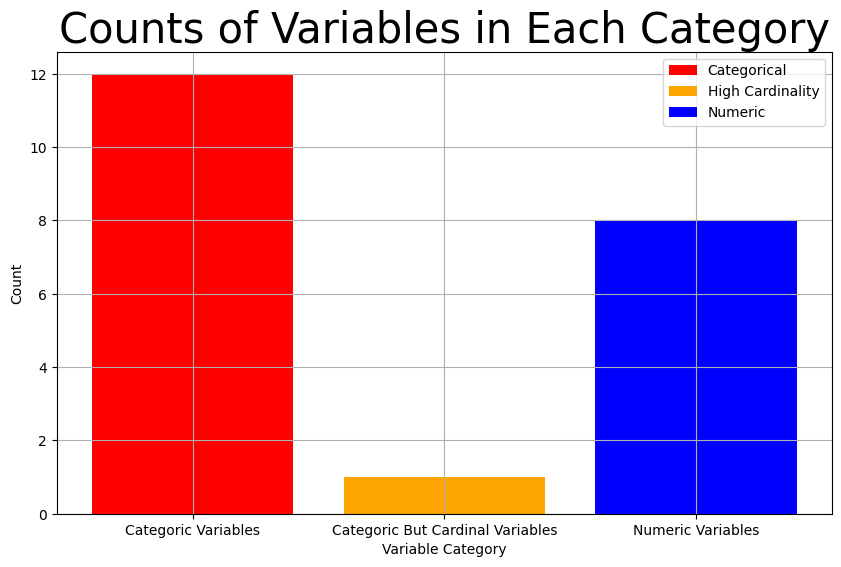

In [4]:
def plot_variable_counts(cat_var, cat_but_car, num_var):
    # Count the number of variables in each category
    category_counts = [len(cat_var), len(cat_but_car), len(num_var)]
    categories = ['Categoric Variables', 'Categoric But Cardinal Variables', 'Numeric Variables']

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, category_counts, color=['red', 'orange', 'blue'])
    plt.title('Counts of Variables in Each Category', fontsize=30)
    plt.xlabel('Variable Category')
    plt.ylabel('Count')
    plt.grid()
    legend_labels = ['Categorical', 'High Cardinality', 'Numeric']
    plt.legend(bars, legend_labels, loc="upper right")
    plt.show()

plot_variable_counts(cat_var, cat_but_car, num_var)

In [109]:
cat_var

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled',
 'SupportTicketsPerMonth',
 'Churn']

Dropping high cardinality column 

In [5]:
print(cat_but_car)
data=data.drop(columns=['CustomerID'])

['CustomerID']


In [6]:
def describe_object(df):
    for col in df.select_dtypes(include = ['object']).columns:
        print(f"For {col} : ", df[col].unique())


describe_object(data)

For SubscriptionType :  ['Premium' 'Basic' 'Standard']
For PaymentMethod :  ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
For PaperlessBilling :  ['No' 'Yes']
For ContentType :  ['Both' 'Movies' 'TV Shows']
For MultiDeviceAccess :  ['No' 'Yes']
For DeviceRegistered :  ['Mobile' 'Tablet' 'Computer' 'TV']
For GenrePreference :  ['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
For Gender :  ['Male' 'Female']
For ParentalControl :  ['No' 'Yes']
For SubtitlesEnabled :  ['No' 'Yes']


In [34]:
# Finding Thresholds (Limits)
def outlier_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    q1 = dataframe[variable].quantile(q1)
    q3 = dataframe[variable].quantile(q3)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit



def check_outlier(dataframe, variable):
    lower_limit, upper_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < lower_limit) | (dataframe[variable] > upper_limit)].shape[0] > 0:
        print(variable, "-->", len(dataframe[(dataframe[variable] < lower_limit) | (dataframe[variable] > upper_limit)]))
        return True
    else:
        return False
        
for i in num_var:
    print(i, ":", check_outlier(data, i))

AccountAge : False
MonthlyCharges : False
TotalCharges --> 741
TotalCharges : True
ViewingHoursPerWeek : False
AverageViewingDuration : False
ContentDownloadsPerMonth : False
UserRating : False
WatchlistSize : False


### Refresher on Anomalies

Local Outlier Factor (LOF) and Isolation Forest are both algorithms for anomaly detection, but they are fundamentally different in their approach and use cases. Here’s how they compare:

| **Aspect**                  | **Local Outlier Factor (LOF)**                                                    | **Isolation Forest**                                                     |
|-----------------------------|----------------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Core Concept**            | Measures the local density of data points relative to their neighbors.           | Isolates anomalies based on random partitions of data using decision trees. |
| **Output**                  | Provides an outlier score for each data point (higher scores = greater likelihood of being an outlier). | Classifies each point as an outlier (`-1`) or normal (`1`), based on its isolation score. |
| **Local vs Global Detection**| Focuses on **local anomalies**, comparing a point’s density to its neighbors.    | Detects **global anomalies**, identifying points isolated in the dataset overall. |
| **Dimensionality Handling** | Can struggle with high-dimensional data, as density estimation becomes less reliable. | Handles high-dimensional data well due to its tree-based structure.       |
| **Neighbor Dependency**     | Requires specifying `n_neighbors` to define the local area for density comparison. | Not dependent on neighbors—works based on splitting data.                |
| **Parameters**              | Key parameters: `n_neighbors` and `contamination`.                               | Key parameters: `n_estimators`, `max_samples`, and `contamination`.       |
| **Speed**                   | Slower for large datasets due to neighbor-based density computations.            | Faster for large datasets, as trees scale efficiently.                   |
| **Best Use Case**           | Effective for datasets where anomalies are context-dependent (e.g., anomalies based on a local cluster). | Ideal for datasets with a mix of continuous or high-dimensional features, or where outliers are globally distinct. |

### **Choosing Between LOF and Isolation Forest**
- **Use LOF** when:
  - You suspect outliers depend on relationships with neighboring points.
  - The dataset has regions of varying density (e.g., clusters with dense and sparse areas).

- **Use Isolation Forest** when:
  - You're dealing with high-dimensional or large datasets.
  - Outliers are globally distinct, rather than local.

If you'd like, I can help walk through a practical example or discuss how these methods perform on your specific dataset! Let me know.

In [76]:
from scipy.stats import zscore
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import pandas as pd


# Isolation Forest Method
def isolation_forest_outliers(dataframe, variable, contamination=0.001):
    data = dataframe[variable].values.reshape(-1, 1)  # Reshape for Isolation Forest
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    labels = iso_forest.fit_predict(data)
    outlier_indices = list(dataframe.index[labels == -1] )
    outliers = (dataframe[variable][labels == -1])
    lower_limit = dataframe[variable].min()  # Placeholder limits
    upper_limit = dataframe[variable].max()
    return lower_limit, upper_limit, len(outliers), outlier_indices

# Loop through numeric variables and apply all methods
results = []

isolation_result = isolation_forest_outliers(data, 'TotalCharges')

results.append({
        'Variable': 'TotalCharges',
        'IsolationForest_Outliers': isolation_result[2],
        'Outlier Indices' : isolation_result[3]
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

       Variable  IsolationForest_Outliers  \
0  TotalCharges                       184   

                                     Outlier Indices  
0  [627, 941, 2800, 3389, 3746, 6948, 7007, 8865,...  


In [88]:
all_index = list()
for row in results_df['Outlier Indices']:
    all_index.extend(row)

all_outliers =list(set(all_index))
len(all_outliers)

184

In [89]:
all_outliers = list(set(all_index))  # Ensure unique indices
outlier_rows = data.loc[all_outliers]  # Extract rows by their indices

# Print all outlier rows
print("All Outlier Rows:")
print(outlier_rows)

All Outlier Rows:
        AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
243716         118       19.937024   2352.568794         Standard   
88582          118       19.932542   2352.039982            Basic   
12807          119       19.981297   2377.774305         Standard   
123914         118       19.862074   2343.724674          Premium   
111628         119       19.820691   2358.662283          Premium   
...            ...             ...           ...              ...   
187383         118       19.760340   2331.720153         Standard   
172024         119       19.792017   2355.249988          Premium   
99835          117       19.907035   2329.123146            Basic   
25596          119       19.846825   2361.772193          Premium   
15870          118       19.843489   2341.531689            Basic   

           PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
243716  Electronic check              Yes    TV Shows                No   
885

In [101]:
# Loop through each SubscriptionType and calculate the range of MonthlyCharges
subscription_types = data['SubscriptionType'].unique()  # Get unique subscription types
ranges = {}

for subscription in subscription_types:
    subset = data[data['SubscriptionType'] == subscription]  # Filter by subscription type
    min_charge = subset['MonthlyCharges'].min()
    max_charge = subset['MonthlyCharges'].max()
    charge_range = max_charge - min_charge
    ranges[subscription] = {'Min': min_charge, 'Max': max_charge, 'Range': charge_range}

# Print the range for each subscription type
for subscription, stats in ranges.items():
    print(f"Subscription Type: {subscription}")
    print(f"  Min MonthlyCharge: {stats['Min']}")
    print(f"  Max MonthlyCharge: {stats['Max']}")
    print(f"  Range: {stats['Range']}\n")

Subscription Type: Premium
  Min MonthlyCharge: 4.990126433329121
  Max MonthlyCharge: 19.98975519044588
  Range: 14.99962875711676

Subscription Type: Basic
  Min MonthlyCharge: 4.990061546582933
  Max MonthlyCharge: 19.989517691391136
  Range: 14.999456144808203

Subscription Type: Standard
  Min MonthlyCharge: 4.990441188568327
  Max MonthlyCharge: 19.989956867323198
  Range: 14.999515678754872



Number of Unique--> [4 8 6 2 9 0 1 7 3 5]


(array([24292., 24283., 24477., 24360., 24618., 24000., 24296., 24626.,
        24400., 24435.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

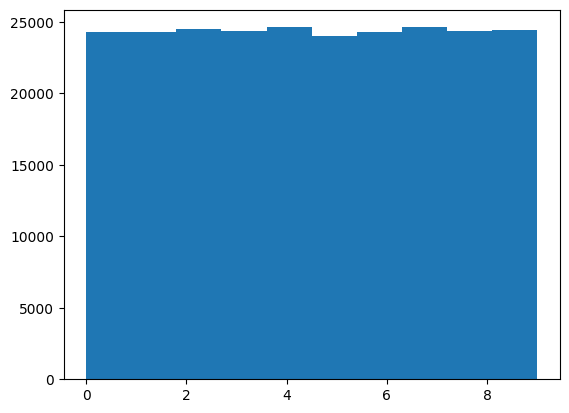

In [112]:
# Grouping SupportTicketsPerMonth

print("Number of Unique-->", data["SupportTicketsPerMonth"].unique())
plt.hist(data['SupportTicketsPerMonth'])

In [ ]:
#!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 187.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 187.9 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 252.2 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 252.2 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 252.2 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 654.9 kB/s eta 0:00:01
   ---------------------------------- --- 266.2/294.9 kB 744.2 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 681.0 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 651.4 kB/s eta 0:


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


***********************************************************
                  SubscriptionType      Ratio
SubscriptionType                             
Standard                     81920  33.603104
Basic                        81050  33.246235
Premium                      80817  33.150660


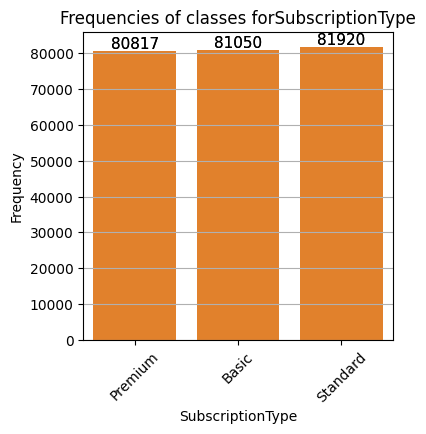

***********************************************************
                  PaymentMethod      Ratio
PaymentMethod                             
Electronic check          61313  25.150234
Credit card               60924  24.990668
Bank transfer             60797  24.938573
Mailed check              60753  24.920525


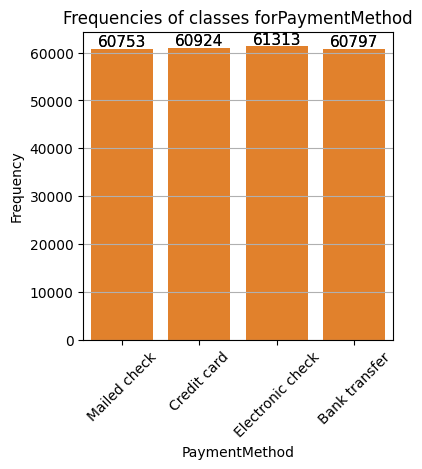

***********************************************************
                  PaperlessBilling      Ratio
PaperlessBilling                             
No                          121980  50.035482
Yes                         121807  49.964518


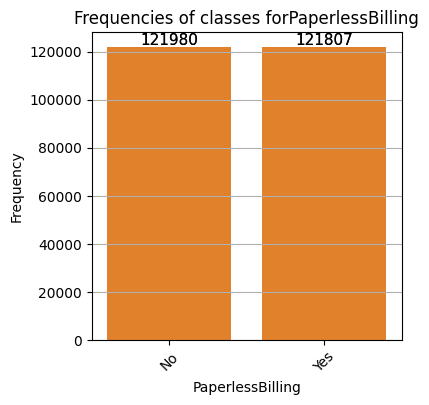

***********************************************************
             ContentType      Ratio
ContentType                        
Both               81737  33.528039
TV Shows           81145  33.285204
Movies             80905  33.186757


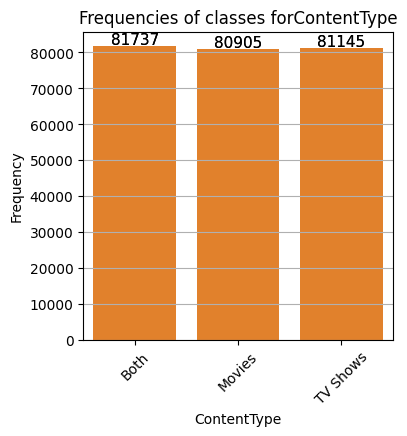

***********************************************************
                   MultiDeviceAccess      Ratio
MultiDeviceAccess                              
No                            122035  50.058042
Yes                           121752  49.941958


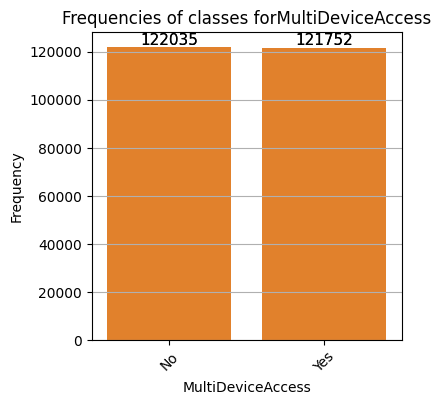

***********************************************************
                  DeviceRegistered      Ratio
DeviceRegistered                             
Computer                     61147  25.082141
Tablet                       61143  25.080501
Mobile                       60914  24.986566
TV                           60583  24.850792


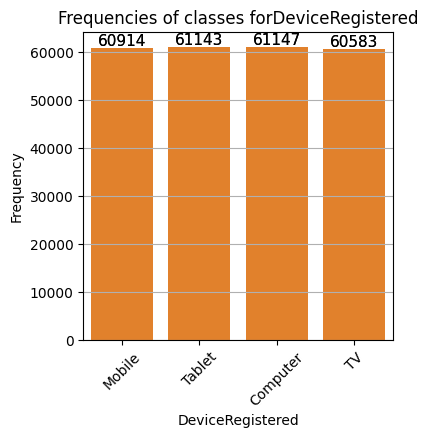

***********************************************************
                 GenrePreference      Ratio
GenrePreference                            
Comedy                     49060  20.124125
Fantasy                    48955  20.081054
Drama                      48744  19.994503
Action                     48690  19.972353
Sci-Fi                     48338  19.827965


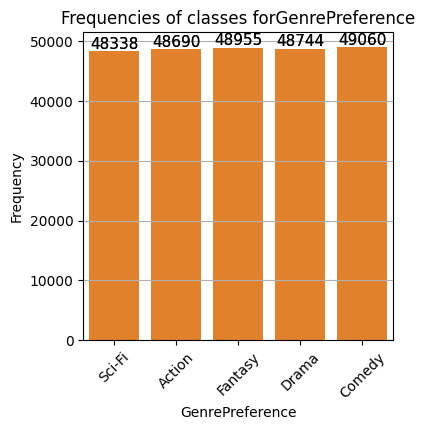

***********************************************************
        Gender      Ratio
Gender                   
Female  121930  50.014972
Male    121857  49.985028


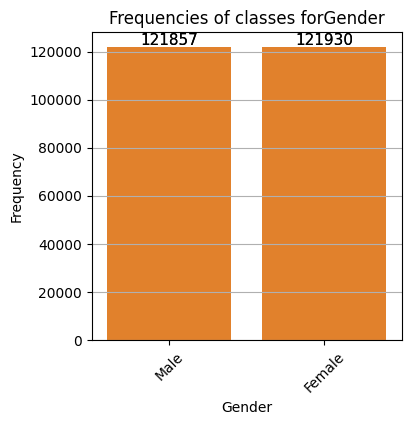

***********************************************************
                 ParentalControl      Ratio
ParentalControl                            
Yes                       122085  50.078552
No                        121702  49.921448


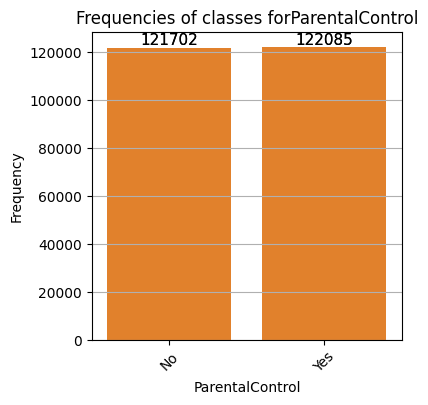

***********************************************************
                  SubtitlesEnabled      Ratio
SubtitlesEnabled                             
Yes                         122180  50.117521
No                          121607  49.882479


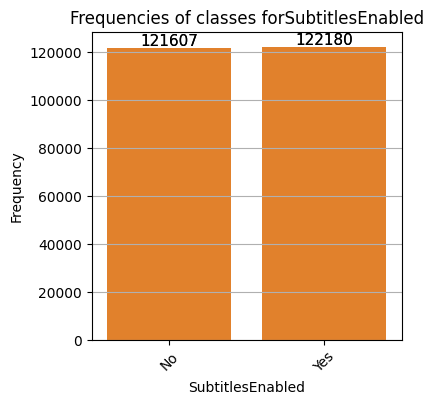

***********************************************************
                        SupportTicketsPerMonth      Ratio
SupportTicketsPerMonth                                   
7                                        24626  10.101441
4                                        24618  10.098159
2                                        24477  10.040322
9                                        24435  10.023094
8                                        24400  10.008737
3                                        24360   9.992329
6                                        24296   9.966077
0                                        24292   9.964436
1                                        24283   9.960744
5                                        24000   9.844659


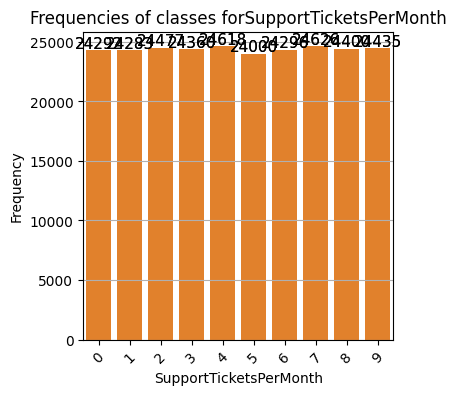

***********************************************************
        Churn      Ratio
Churn                   
0      199605  81.876802
1       44182  18.123198


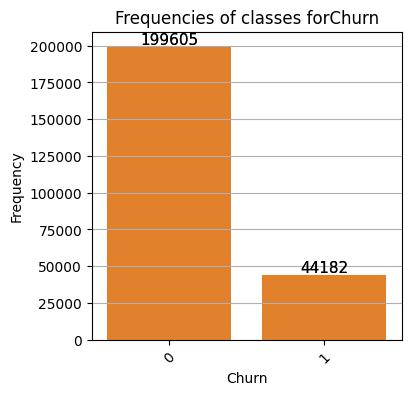

In [106]:
import seaborn as sns
def cat_var_anal(dataframe, cat_cols, plot=False):
    for i in cat_cols:
        print("***********************************************************")
        print(pd.DataFrame({i: dataframe[i].value_counts(),
                            "Ratio": dataframe[i].value_counts() * 100 / len(dataframe)}))

        if plot:

            plt.figure(figsize=(4, 4))
            sns.countplot(data=dataframe, x=i)
            plt.title("Frequencies of classes for" + i)
            plt.xlabel(i)
            plt.ylabel("Frequency")
            plt.xticks(fontsize=10, rotation=45)
            plt.yticks(fontsize=10)
            plt.grid()

            ax = sns.countplot(data=dataframe, x=i)
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=11,
                            color='black', xytext=(0, 5),
                            textcoords='offset points')

            plt.show(block=True)

cat_var_anal(data, cat_var, plot=True)

The probability of observing class 0 (i.e., non-churn class) is approximately 82%, while the probability of observing class 1 (i.e., churn class) is approximately 18%. Therefore, our dataset is imbalanced. We should consider this imbalance when building our models later on

                          AccountAge  MonthlyCharges  TotalCharges  \
AccountAge                  1.000000        0.001706      0.820144   
MonthlyCharges              0.001706        1.000000      0.498207   
TotalCharges                0.820144        0.498207      1.000000   
ViewingHoursPerWeek        -0.001640       -0.003029     -0.003006   
AverageViewingDuration      0.000191       -0.000604      0.000860   
ContentDownloadsPerMonth    0.001220       -0.000127      0.000208   
UserRating                  0.000440        0.000056      0.000609   
WatchlistSize              -0.002640       -0.000540     -0.001770   

                          ViewingHoursPerWeek  AverageViewingDuration  \
AccountAge                          -0.001640                0.000191   
MonthlyCharges                      -0.003029               -0.000604   
TotalCharges                        -0.003006                0.000860   
ViewingHoursPerWeek                  1.000000                0.000949   
Aver

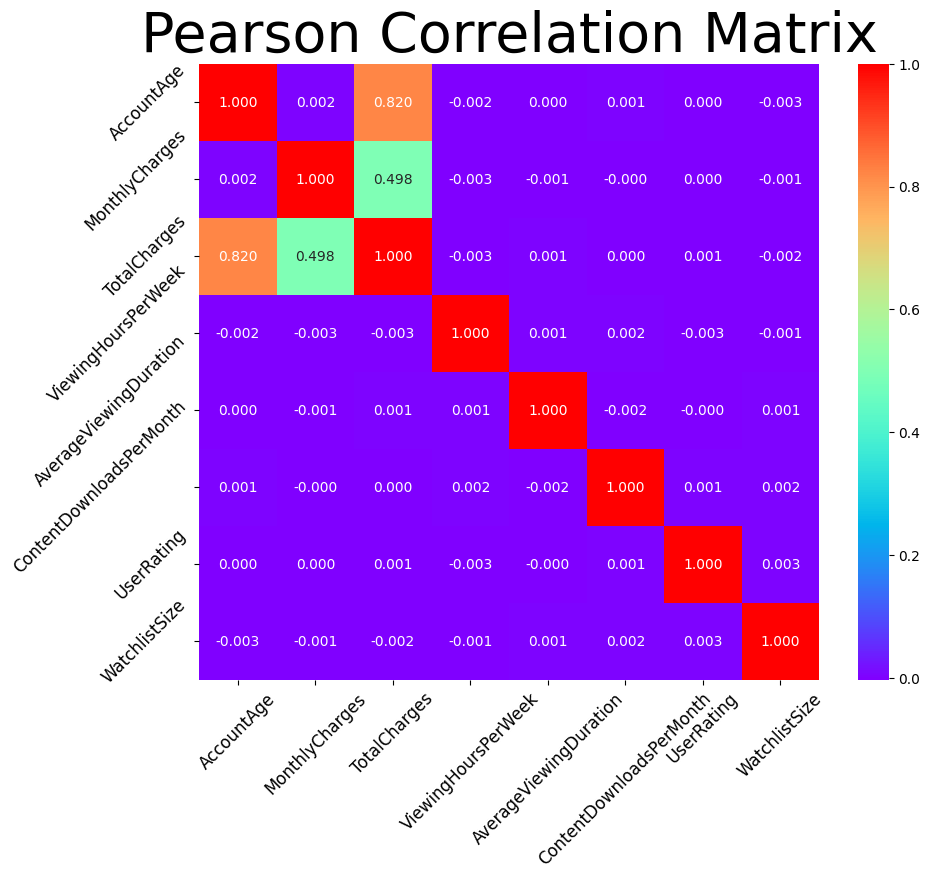

None


In [108]:
# Pearson Correlation Analysis for Numeric Variables
def pearson_corr(dataframe, num_cols, plot=False):

    print(dataframe[num_cols].corr())

    if plot:
        plt.figure(figsize=[10, 8])
        sns.heatmap(data=dataframe[num_cols].corr(), annot=True, fmt=".3f",
                    linecolor="pink", cmap="rainbow")
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(rotation=45, fontsize=12)
        plt.title("Pearson Correlation Matrix", fontsize=40)
        print(plt.show())

pearson_corr(data, num_var, plot=True)

The "Elbow Method" graph you've shared visually represents the point at which adding more clusters doesn't significantly improve the fit of the model (measured by "distortion"). The elbow in this graph seems to occur around 3 clusters, where the rate of decrease in distortion starts slowing down.
This indicates that 3 clusters might be the optimal choice for your dataset. Beyond this point, adding more clusters likely results in overfitting or unnecessary segmentation without substantial gain in modeling quality.

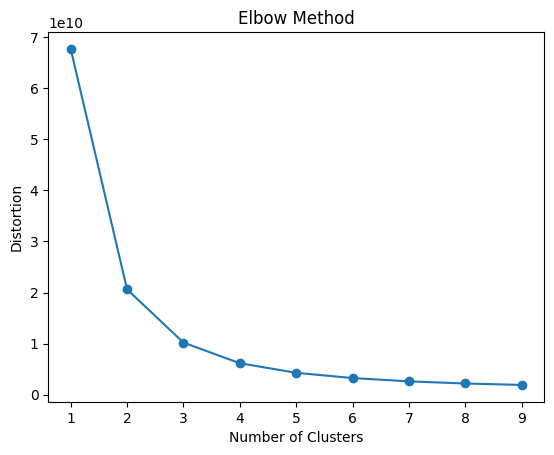

In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for k in range(1, 10):  # Iterate over potential cluster counts
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data[num_var])
    distortions.append(model.inertia_)  # Measure within-cluster variance

plt.plot(range(1, 10), distortions, 'o-')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.show()

In [63]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=3)  # Set the number of neighbors
labels = lof.fit_predict(data[num_var])     # Fit the model to the numeric variables

# Get negative outlier scores
df_scores = lof.negative_outlier_factor_


These values represent the **negative outlier factor scores** generated by the Local Outlier Factor (LOF) algorithm for data points in your dataset. 

### **Interpretation of LOF Scores**
1. **The Negative LOF Scores:**
   - Each score corresponds to how "outlier-like" a particular observation is.
   - The more negative the score, the greater the likelihood that the observation is an outlier relative to its local neighborhood.
   - Values close to `-1` suggest the point is normal and not an outlier.

2. **Scores below:**
   - The most negative score in your data is **-1.85631734**, which suggests that this observation is significantly isolated and likely an outlier.
   - As the scores become closer to `-1` (e.g., **-1.555** or higher), the data points appear less anomalous and more in-line with their neighbors.
   - The scores near **-1.544** are likely normal data points based on LOF's density-based approach.


### **Thresholding Outliers**
To identify specific outliers, you can:
- **Set a cutoff value**: For example, consider all observations with a score below a certain threshold (e.g., **-1.7**) as outliers.
- **Visualize LOF scores**: Plot the scores to observe natural breaks or patterns that differentiate outliers from inliers.

Would you like to analyze the flagged outlier rows further or visualize the scores to refine your analysis? Let me know!

243787
[-1.85631734 -1.77169134 -1.75949448 -1.70261237 -1.67894068 -1.67736925
 -1.67686576 -1.61752445 -1.60669967 -1.59076934 -1.58268179 -1.57900371
 -1.57557096 -1.5746207  -1.57080208 -1.56802683 -1.56628472 -1.56423096
 -1.56382545 -1.56184881 -1.56092092 -1.55557084 -1.55550974 -1.5526689
 -1.55202231 -1.55180363 -1.54943862 -1.54763953 -1.5470377  -1.54481983]


<Figure size 1400x1000 with 0 Axes>

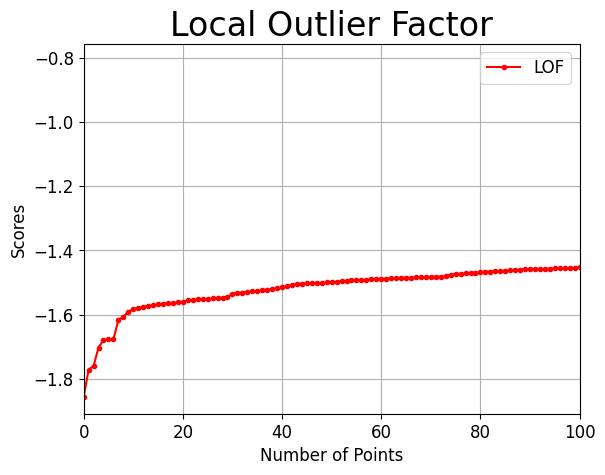

In [67]:
# Print the lowest 6 scores (most anomalous points)
print(len(df_scores))
print(np.sort(df_scores)[:30])

# Visualize LOF Scores
scores = pd.DataFrame(np.sort(df_scores), columns=["Scores"])  # Create a DataFrame
plt.figure(figsize=(14, 10))  # Set figure size

# Plot the scores
scores.plot(stacked=True, xlim=[0, 100], style=".-", color="red")
plt.title("Local Outlier Factor", fontsize=24)
plt.xlabel("Number of Points", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.legend(["LOF"], fontsize=12)
plt.show()

In [72]:
import pandas as pd

# Assuming `df_scores` contains the LOF scores for each row
threshold = -1.61752445  # Set the threshold for outliers
print(len(data[df_scores < threshold]))
# Pull out the rows that are outliers
outlier_rows = data[df_scores < threshold]
print("Outlier Rows:")
print(outlier_rows)

# Optionally, save the outlier rows to a CSV file for further analysis
outlier_rows.to_csv("outliers.csv", index=False)

8
Outlier Rows:
        AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
64085           40       19.916210    796.648416            Basic   
90935            1       18.883396     18.883396            Basic   
91166          119       19.987013   2378.454499         Standard   
114504          10       15.215474    152.154740          Premium   
132329         116       19.796236   2296.363359            Basic   
156491          13       17.893607    232.616896         Standard   
164339          31        7.363296    228.262167          Premium   
165354         119       19.911119   2369.423194          Premium   

           PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
64085       Mailed check               No    TV Shows                No   
90935        Credit card              Yes    TV Shows               Yes   
91166      Bank transfer              Yes    TV Shows               Yes   
114504       Credit card               No    TV Shows         

In [ ]:
data.select_dtypes(include=['number']).corr()


,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
AccountAge,1.000000,0.001706,0.820144,-0.001640,0.000191,0.001220,0.000440,-0.002055,-0.002640,-0.197736
MonthlyCharges,0.001706,1.000000,0.498207,-0.003029,-0.000604,-0.000127,0.000056,0.000071,-0.000540,0.100473
TotalCharges,0.820144,0.498207,1.000000,-0.003006,0.000860,0.000208,0.000609,-0.001770,-0.001770,-0.120529
ViewingHoursPerWeek,-0.001640,-0.003029,-0.003006,1.000000,0.000949,0.002149,-0.003185,0.000788,-0.000750,-0.128645
AverageViewingDuration,0.000191,-0.000604,0.000860,0.000949,1.000000,-0.002397,-0.000406,-0.000158,0.000749,-0.146897
ContentDownloadsPerMonth,0.001220,-0.000127,0.000208,0.002149,-0.002397,1.000000,0.001294,-0.000497,0.002324,-0.129752
UserRating,0.000440,0.000056,0.000609,-0.003185,-0.000406,0.001294,1.000000,-0.000142,0.002567,0.022124
SupportTicketsPerMonth,-0.002055,0.000071,-0.001770,0.000788,-0.000158,-0.000497,-0.000142,1.000000,0.001250,0.084064
WatchlistSize,-0.002640,-0.000540,-0.001770,-0.000750,0.000749,0.002324,0.002567,0.001250,1.000000,0.021739
Churn,-0.197736,0.100473,-0.120529,-0.128645,-0.146897,-0.129752,0.022124,0.084064,0.021739,1.000000


In [150]:
y = data['Churn']  # Target variable
# Define the feature columns (all columns except 'Churn')
X = data.drop(columns=['Churn'])

In [151]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (195029, 19)
X_test shape: (48758, 19)
y_train shape: (195029,)
y_test shape: (48758,)


In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numeric_features = X.select_dtypes(include = ['number']).columns.to_list()
categorical_features =X.select_dtypes(include = ['object']).columns.to_list()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
        
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))                     # One-hot encode categories
])


# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [116]:
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('model', SGDClassifier())             # ML model
])

# Fit the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['AccountAge',
                                                   'ViewingHoursPerWeek',
                                                   'AverageViewingDuration',
                                                   'ContentDownloadsPerMonth',
                                                   'UserRating',
                                                   'SupportTicketsPerMonth',
                                                   'WatchlistSize']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SubscriptionType',
                                                   'PaymentMethod',
                                                   'PaperlessBilling',
                                                   'ContentType',
                                                   'MultiDeviceAccess',
                                                   'DeviceRegistered',
                                                   'GenrePreference', 'Gender',
                                                   'ParentalControl',
                                                   'SubtitlesEnabled'])])),
                ('model', SGDClassifier())])

In [117]:
# Make predictions
predictions = pipeline.predict(X_test)
print("Predictions:", predictions)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(predictions, y_test)
print("Accuracy:", accuracy)

Predictions: [0 1 0 ... 0 0 0]
Accuracy: 0.82185487509742


In [118]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_predict

Y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)

print(confusion_matrix(y_train,Y_train_pred))
print("Precision", precision_score(y_train,Y_train_pred))
print("Recall", recall_score(y_train,Y_train_pred))

[[141167  18470]
 [ 25841   9551]]
Precision 0.34085150422897115
Recall 0.2698632459312839


#### Testing for changing recall with change in threshold! This excercsie is just to get a custom threshold for model needs, our current model is still not good enough for that.

In [119]:
from sklearn.metrics import precision_recall_curve
Y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=5,method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, Y_train_pred)

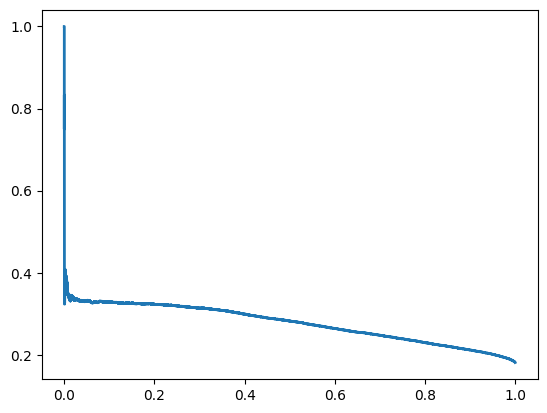

In [120]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

In [121]:
from sklearn.ensemble import RandomForestClassifier

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('model', RandomForestClassifier())             # ML model
])

# Fit the pipeline
pipeline_RF.fit(X_train, y_train)

Y_train_pred = cross_val_predict(pipeline_RF, X_train, y_train, cv=5)

print(confusion_matrix(y_train,Y_train_pred))
print("Precision", precision_score(y_train,Y_train_pred))
print("Recall",recall_score(y_train,Y_train_pred))

[[158155   1482]
 [ 33490   1902]]
Precision 0.5620567375886525
Recall 0.05374095840867993


For a **churn model**, the choice between precision and recall depends on the business context, here we would want to **prioritize recall** while maintaining a reasonable level of precision.

1. **Focus on Recall**:
   - **Why?**: Recall ensures that we identify as many churners as possible (low false negatives). Missing a churner is risky because it means we could be losing a customer without taking proactive action.
   - **Example**: If we fail to identify a churner, we would lose the chance to offer retention strategies, like discounts or improved service.

2. **Precision is Still Important**:
   - **Why?**: High precision ensures that the customers flagged as likely churners are actually at risk (low false positives). This is important to avoid wasting resources on customers who are unlikely to churn.
   - **Example**: If precision is too low, you might offer retention incentives to customers who don’t need them, leading to unnecessary costs.


### **Practical Approach based on Business Needs**
- If retaining customers is critical, then **recall**. Flagging more potential churners, even if it includes false positives, is safer.
- If the budget for this feature is restrained based on small budget (low costs) (e.g., retention campaigns), ensure a balance by optimizing the **F1-Score**.


In [122]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds=roc_curve(y_train,Y_train_pred)

The ROC curve plots
sensitivity (recall) versus 1 – specificity.

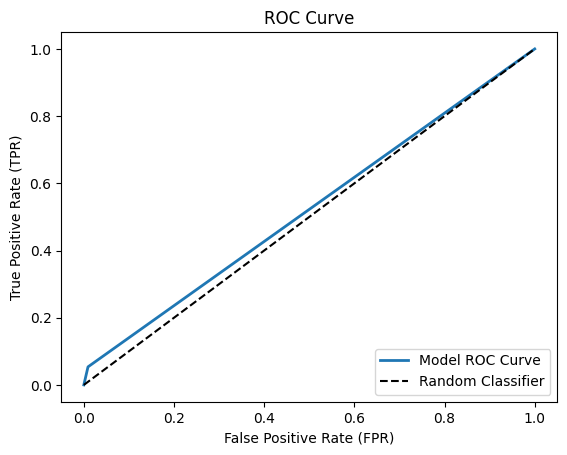

In [123]:

plt.plot(fpr, tpr, linewidth=2, label="Model ROC Curve")

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Enhance the plot with labels, title, and legend
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")

# Display the plot
plt.show()

In [32]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 558.5 kB/s eta 0:04:29
   ---------------------------------------- 0.1/150.0 MB 558.5 kB/s eta 0:04:29
   ---------------------------------------- 0.2/150.0 MB 706.2 kB/s eta 0:03:33
   ---------------------------------------- 0.2/150.0 MB 706.2 kB/s eta 0:03:33
   ---------------------------------------- 0.2/150.0 MB 706.2 kB/s eta 0:03:33
   ---------------------------------------- 0.3/150.0 MB 881.8 kB/s eta 0:02:50
   ---------------------------------------- 0.7/150.0 MB 1.8 MB/s eta 0:01:24
   -------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [144]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [149]:
categorical_features

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled']

In [156]:
def standardization(dataframe, variable, select=1):
    if select == 1:
        ss = StandardScaler()
        dataframe[variable] = ss.fit_transform(dataframe[variable])
    elif select == 2:
        mms = MinMaxScaler()
        dataframe[variable] = mms.fit_transform(dataframe[variable])
    elif select == 3:
        rs = RobustScaler()
        dataframe[variable] = rs.fit_transform(dataframe[variable])
    else:
        print("Please Enter Correct Number for Scaling")

standardization(df, num_var)

NameError: name 'df' is not defined

In [154]:
# Import Required Libraries
from imblearn.pipeline import Pipeline  # Pipeline supporting SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['number']).columns.to_list()
categorical_features = X.select_dtypes(include=['object']).columns.to_list()

# List of ordinal features and their defined order
ordinal_features = ['SubscriptionType']
ordinal_categories = [['Basic', 'Standard', 'Premium']]  # Order defined explicitly

# Separate remaining categorical features
remaining_categorical_features = [col for col in categorical_features if col not in ordinal_features]

# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for ordinal categorical features
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(categories=ordinal_categories))
])

# Preprocessing for remaining categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, remaining_categorical_features)
    ]
)

# XGBoost model with class weighting
model = RandomForestClassifier()

# SMOTE Oversampling Step + Pipeline Integration
pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('smote', SMOTE(random_state=42, sampling_strategy='minority')),  # SMOTE step
    ('model', model)                                 # XGBClassifier
])

# Apply StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Y_train_pred_proba = cross_val_predict(pipeline_XGB, X_train, y_train, cv=skf, method="predict_proba")[:, 1]



Confusion Matrix:
[[  5590 154047]
 [   129  35263]]
Precision: 0.18627119539379852
Recall: 0.9963551084990958


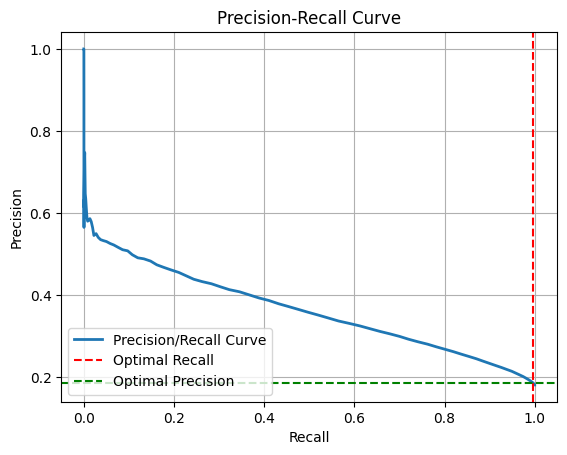

In [155]:
# Dynamic Threshold Adjustment
precision, recall, thresholds = precision_recall_curve(y_train, Y_train_pred_proba)

# Optimal Threshold Selection
optimal_idx = np.argmax(precision + recall)  # Balance Precision and Recall
optimal_threshold = thresholds[optimal_idx]
Y_train_pred_adjusted = (Y_train_pred_proba >= optimal_threshold).astype(int)

# Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_train, Y_train_pred_adjusted))
print("Precision:", precision_score(y_train, Y_train_pred_adjusted))
print("Recall:", recall_score(y_train, Y_train_pred_adjusted))

# Plot Precision-Recall Curve
plt.plot(recall, precision, linewidth=2, label="Precision/Recall Curve")
plt.axvline(x=recall[optimal_idx], color="red", linestyle="--", label="Optimal Recall")
plt.axhline(y=precision[optimal_idx], color="green", linestyle="--", label="Optimal Precision")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [147]:
# Set a higher threshold
new_threshold = 0.6  # Experiment with values above the optimal threshold
Y_train_pred_adjusted = (Y_train_pred_proba >= new_threshold).astype(int)

# Evaluate precision and recall again
print(confusion_matrix(y_train, Y_train_pred_adjusted))
print("Precision:", precision_score(y_train, Y_train_pred_adjusted))
print("Recall:", recall_score(y_train, Y_train_pred_adjusted))

[[124560  35077]
 [ 16923  18469]]
Precision: 0.34491838792813656
Recall: 0.5218410940325497


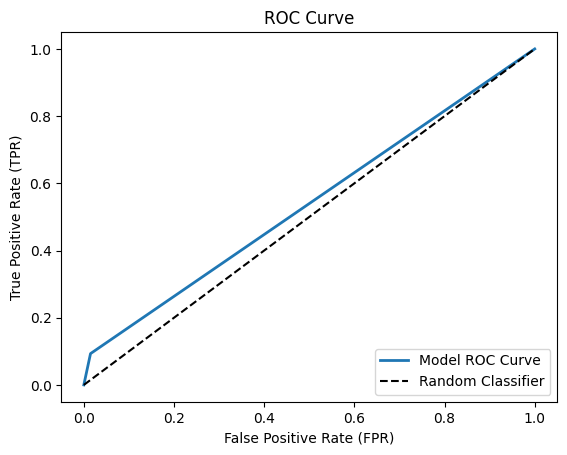

In [29]:
fpr, tpr, thresholds=roc_curve(y_train,Y_train_pred)
plt.plot(fpr, tpr, linewidth=2, label="Model ROC Curve")
# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
# Enhance the plot with labels, title, and legend
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
# Display the plot
plt.show()

In [132]:
!pip install catboost


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [138]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [139]:
import numpy
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['number']).columns.to_list()
categorical_features = X.select_dtypes(include=['object']).columns.to_list()

# List of ordinal features and their defined order
ordinal_features = ['SubscriptionType']
ordinal_categories = [['Basic', 'Standard', 'Premium']]  # Order defined explicitly

# Separate remaining categorical features
remaining_categorical_features = [col for col in categorical_features if col not in ordinal_features]

# Numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Ordinal transformer for ordered categorical variables
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(categories=ordinal_categories))
])

# One-hot encoder for remaining categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, remaining_categorical_features)
    ]
)
pipeline_DC = Pipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('model', CatBoostClassifier())             # ML model
])

# Fit the pipeline
pipeline_DC.fit(X_train, y_train)

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Y_train_pred = cross_val_predict(pipeline_XGB, X_train, y_train, cv=skf)

print(confusion_matrix(y_train,Y_train_pred))
print("Precision", precision_score(y_train,Y_train_pred))
print("Recall",recall_score(y_train,Y_train_pred))



precision, recall, thresholds = precision_recall_curve(y_train, Y_train_pred)

# Plot Precision-Recall curve
plt.plot(recall, precision, linewidth=2, label="Precision/Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject